In [22]:
#Oliver James
#02101322

In [23]:
#Task number 1 read the CSV file master_suicide_data.csv and create some initial dataframes and data cleaning

#start by importing pandas to read in CSV file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the CSV file
suicide_data = pd.read_csv("master_suicide_data.csv").convert_dtypes()



#create some new column names, most I kept as the same title, I'm also not including all the fields from CSV file
new_column_names = {"country":"country",
                    "year":"year",
                    "sex":"sex",
                    "age": "age",
                    "suicides_no": "num_of_suicides",
                    "population":"population",
                    "suicides/100k pop":"suicides/100k",
                    "HDI for year": "HDI_Per_Year",
                    "gdp_per_capita ($)": "gdp_per_capita($)",
                    "generation":"generation"}

#add new columns to the suicide data
suicide_data = suicide_data.rename(columns=new_column_names)

selected_columns = ['country', 'year', 'sex', 'age','num_of_suicides','population', 'suicides/100k', 'HDI_Per_Year','gdp_per_capita($)','generation']

suicide_data_selected = suicide_data[selected_columns]

suicide_data_selected = suicide_data[selected_columns].copy()


      sex             country  num_of_suicides  population  suicides/100k
153  male           Lithuania            23028    31473618      73.166040
176  male  Russian Federation           995412  1710091647      58.208108
112  male             Belarus            49890    91729737      54.388033
152  male              Latvia            10296    20509370      50.201445
141  male             Hungary            55776   117934972      47.293860
188  male           Sri Lanka            42043    91059324      46.170999
148  male          Kazakhstan            83386   181256041      46.004536
131  male             Estonia             5641    12523391      45.043711
196  male             Ukraine           258573   591598875      43.707487
185  male            Slovenia             8313    19708428      42.179924


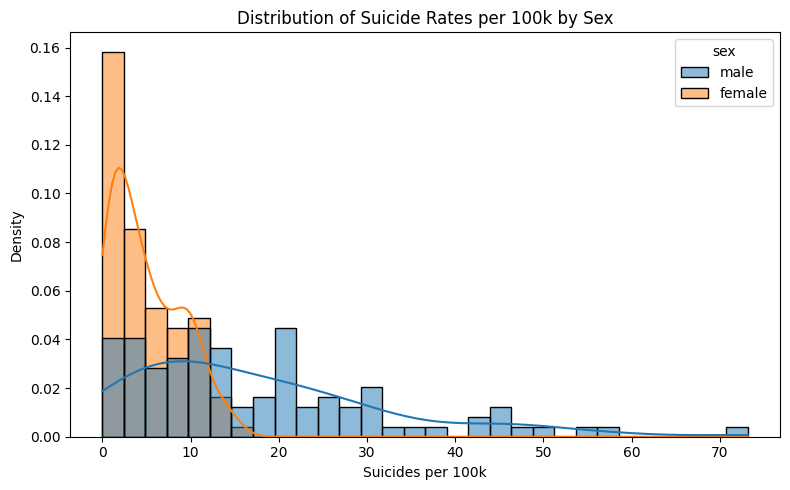

The Kernel Density Estimate shows that suicide rates tend to be higher for males across a broader range of values compared to females, 
whose rates are more concentrated in the lower range.


In [24]:
# Step 1: Group by 'sex' and 'country', then sum 'num_of_suicides' and 'population'
suicides_per_100k_stats = suicide_data_selected.groupby(['sex', 'country'])[['num_of_suicides', 'population']].sum().reset_index()

# Step 2: Create the 'suicides/100k' column with a lambda function
suicides_per_100k_stats['suicides/100k'] = suicides_per_100k_stats.apply(
    lambda row: (row['num_of_suicides'] / row['population']) * 100_000 if row['population'] != 0 else 0, 
    axis=1
)

# Step 3: Sort the DataFrame by 'suicides/100k' in descending order
suicides_per_100k_stats_sorted = suicides_per_100k_stats.sort_values('suicides/100k', ascending=False)
print(suicides_per_100k_stats_sorted.head(10))

# Step 4: Visualize the distribution of suicide rates by sex
plt.figure(figsize=(8, 5))
sns.histplot(data=suicides_per_100k_stats_sorted, x='suicides/100k', bins=30, kde=True, color='blue', hue='sex', stat='density', common_norm=False)
plt.title('Distribution of Suicide Rates per 100k by Sex')
plt.xlabel('Suicides per 100k')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

print('The Kernel Density Estimate shows that suicide rates tend to be higher for males across a broader range of values compared to females, \nwhose rates are more concentrated in the lower range.')


#"""

In [25]:
##Now I'm going to find outliers, and investigate them, most seem to be between 0 and 20, so 100 plus seems incorrect
extreme_suicide_rates = suicide_data_selected[suicide_data_selected['suicides/100k'] > 100]

# Select relevant columns for analysis (country, year, sex, suicide rate)
extreme_suicide_rates = extreme_suicide_rates[['country', 'year', 'sex', 'age', 'suicides/100k']]

# Display the extreme cases
print(extreme_suicide_rates)

print('186 rows are returned, so the data is likely not innacurate')
print('However, it is important to note, the overwhelming majority of suicides per 100k are between 0 and 50, these are extereme outliers in certain periods')

        country  year     sex        age  suicides/100k
1258      Aruba  1995    male  75+ years         224.97
1282      Aruba  2000  female  75+ years         133.42
1283      Aruba  2000    male  75+ years         101.11
1798    Austria  1986    male  75+ years         109.01
1810    Austria  1987    male  75+ years         128.72
...         ...   ...     ...        ...            ...
24092  Suriname  1990    male  75+ years          150.0
24308  Suriname  2010    male  75+ years         100.12
24332  Suriname  2012    male  75+ years         187.06
27364   Uruguay  1999    male  75+ years         104.89
27400   Uruguay  2002    male  75+ years         115.05

[186 rows x 5 columns]
186 rows are returned, so the data is likely not innacurate
However, it is important to note, the overwhelming majority of suicides per 100k are between 0 and 50, these are extereme outliers in certain periods


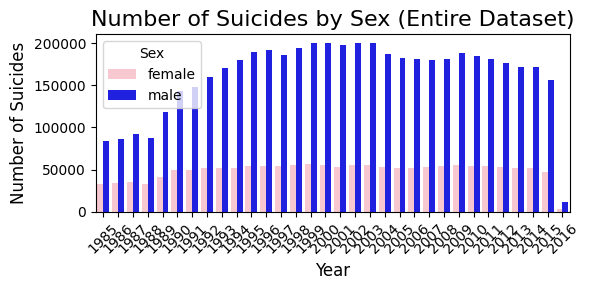

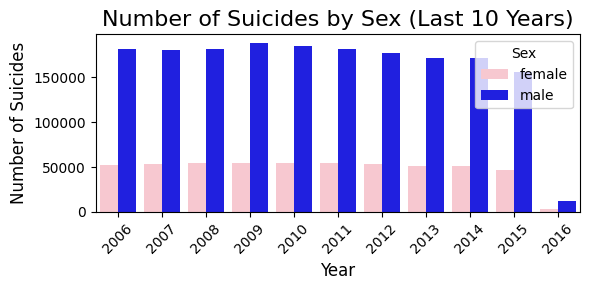

Note: Men make up the lions share of suicide cases in both graphs


In [26]:
#Lets take a look at the relationship between sex, age, and generation and see what relationships exist

# Get the most recent year from the dataset
most_frequent_sex = suicide_data_selected['sex'].value_counts().idxmax()
most_frequent_age = suicide_data_selected['age'].value_counts().idxmax()
most_frequent_generation = suicide_data_selected['generation'].value_counts().idxmax()


filtered_data = suicide_data_selected[(suicide_data_selected['year'] >= 1985) & (suicide_data_selected['year'] <= 2016)]

# Group the data by 'sex' and 'year', then sum the number of suicides for each group
suicides_by_sex_year = filtered_data.groupby(['year', 'sex'])['num_of_suicides'].sum().reset_index()

#sort by the year
suicides_by_sex_year = suicides_by_sex_year.sort_values(by='year')


# Visualize the number of suicides for men and women over the last 10 years
custom_colors = ['pink','blue']
plt.figure(figsize=(6, 3))
sns.barplot(x='year', y='num_of_suicides', hue='sex', palette=custom_colors,data=suicides_by_sex_year.groupby(['year', 'sex'])['num_of_suicides'].sum().reset_index())

# Adding title and labels
plt.title('Number of Suicides by Sex (Entire Dataset)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Suicides', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()

# Show the plot
plt.show()



filtered_data = suicide_data_selected[(suicide_data_selected['year'] >= 2006) & (suicide_data_selected['year'] <= 2016)]

# Group the data by 'sex' and 'year', then sum the number of suicides for each group
suicides_by_sex_year = filtered_data.groupby(['year', 'sex'])['num_of_suicides'].sum().reset_index()

#sort by the year
suicides_by_sex_year = suicides_by_sex_year.sort_values(by='year')


# Visualize the number of suicides for men and women over the last 10 years
custom_colors = ['pink','blue']
plt.figure(figsize=(6, 3))
sns.barplot(x='year', y='num_of_suicides', hue='sex', palette=custom_colors,data=suicides_by_sex_year.groupby(['year', 'sex'])['num_of_suicides'].sum().reset_index())

# Adding title and labels
plt.title('Number of Suicides by Sex (Last 10 Years)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Suicides', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()

# Show the plot
plt.show()

print('Note: Men make up the lion''s share of suicide cases in both graphs')





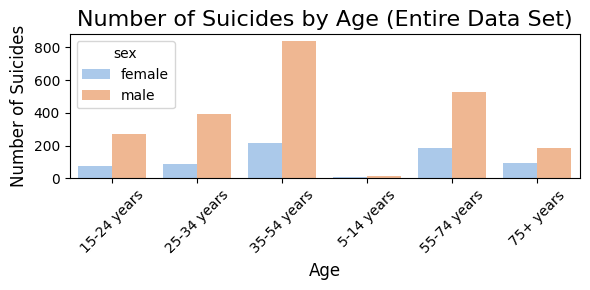

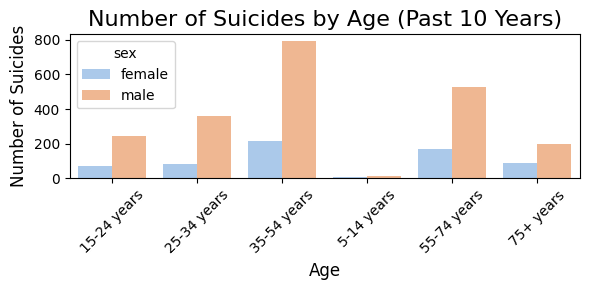

The graphs appear identical
That suggests that the average number of suicides by age for both time frames may not show significant variation.


In [27]:
#----- Lets take a look at most common age groups
# Analysis of age groups
# Grouping and calculating suicides by age for the entire dataset
filtered_data_entire = suicide_data_selected[(suicide_data_selected['year'] >= 1985) & (suicide_data_selected['year'] <= 2016)]

suicides_by_age = filtered_data_entire.groupby(['age','sex'])['num_of_suicides'].mean().reset_index()
suicides_by_age = suicides_by_age.sort_values(by='age')

# Visualize the data on age groups for suicide (Entire Dataset)
plt.figure(figsize=(6, 3))
sns.barplot(x='age', y='num_of_suicides', palette='pastel',hue='sex', data=suicides_by_age)
plt.title('Number of Suicides by Age (Entire Data Set)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Suicides', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Do the same for the last 10 years
# Grouping and calculating suicides by age for the last 10 years
filtered_data_10 = suicide_data_selected[(suicide_data_selected['year'] >= 2006) & (suicide_data_selected['year'] <= 2016)]

#suicides_by_age_10 = filtered_data_10.groupby(['age'])['num_of_suicides'].mean().reset_index()
suicides_by_age_10 = filtered_data_10.groupby(['age','sex'])['num_of_suicides'].mean().reset_index()
suicides_by_age_10 = suicides_by_age_10.sort_values(by='age')  # Correct variable name used here

# Visualize the data on age groups for suicide (Last 10 Years)
plt.figure(figsize=(6, 3))
#sns.barplot(x='age', y='num_of_suicides', palette='pastel',hue='age', data=suicides_by_age_10)
sns.barplot(x='age', y='num_of_suicides', palette='pastel',hue='sex', data=suicides_by_age_10)
plt.title('Number of Suicides by Age (Past 10 Years)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Suicides', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Added show() to display the second plot
plt.show()


print('The graphs appear identical')
print('That suggests that the average number of suicides by age for both time frames may not show significant variation.')

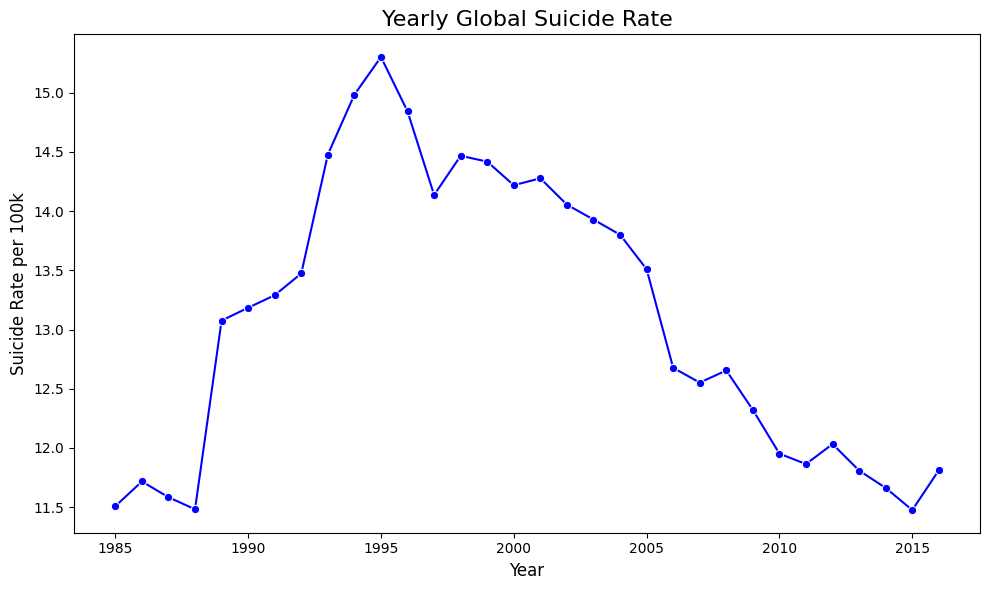

The plot illustrates that the global suicide rate was at its highest in the mid-1990s but has steadily decreased since then. 
The increase in the early 1990s followed by a steady drop indicates a significant shift in global suicide trends after that peak.
There were many events during the mid 1990s, such as the fall of the Soviet Union, the Asian financial crisis, and the Rwanda Genocide among others.


In [28]:
# Calculate the suicide rate per 100k (as you've already done)
filtered_data_10 = suicide_data_selected[(suicide_data_selected['year'] >= 1985) ]
df_yearly_rate = filtered_data_10.groupby('year')[['num_of_suicides', 'population']].sum().reset_index()
df_yearly_rate['per_100k'] = df_yearly_rate.apply(lambda row: (row['num_of_suicides'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot with markers using seaborn
sns.lineplot(x='year', y='per_100k', data=df_yearly_rate, marker='o', color='b')

# Add title and labels
plt.title('Yearly Global Suicide Rate', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicide Rate per 100k', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

print('The plot illustrates that the global suicide rate was at its highest in the mid-1990s but has steadily decreased since then. \nThe increase in the early 1990s followed by a steady drop indicates a significant shift in global suicide trends after that peak.')
print('There were many events during the mid 1990s, such as the fall of the Soviet Union, the Asian financial crisis, and the Rwanda Genocide among others.')

In [29]:
df_country_rates_by_sex = filtered_data_10.groupby(['sex','country'])[['num_of_suicides','population']].sum().reset_index()
df_country_rates_by_sex['suicides/100k'] = df_country_rates_by_sex.apply(lambda row: (row['num_of_suicides'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)
sex_top_25 = df_country_rates_by_sex.sort_values(by = 'suicides/100k', ascending = False).head(25)

print(sex_top_25.head(10))

      sex             country  num_of_suicides  population  suicides/100k
153  male           Lithuania            23028    31473618      73.166040
176  male  Russian Federation           995412  1710091647      58.208108
112  male             Belarus            49890    91729737      54.388033
152  male              Latvia            10296    20509370      50.201445
141  male             Hungary            55776   117934972      47.293860
188  male           Sri Lanka            42043    91059324      46.170999
148  male          Kazakhstan            83386   181256041      46.004536
131  male             Estonia             5641    12523391      45.043711
196  male             Ukraine           258573   591598875      43.707487
185  male            Slovenia             8313    19708428      42.179924


C:\Users\ollie\AppData\Local\Temp\ipykernel_34672\3460821066.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='HDI_Per_Year', y='suicides/100k', data=suicides_by_hdi_year, palette='colorblind', marker='o')


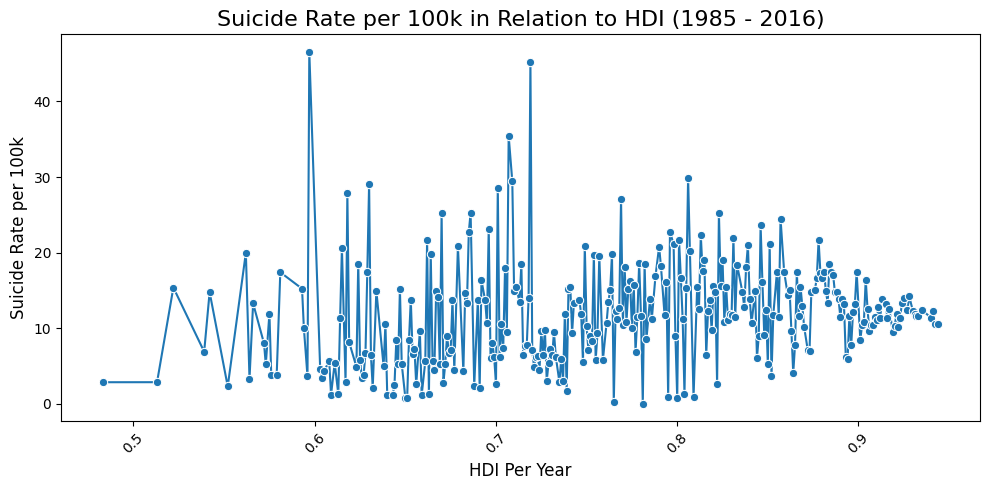

Correlation between HDI and Average Suicide Rate: 0.19
A correlation coefficient of 0.19 indicates a weak positive relationship between the Human Development Index (HDI) and the average suicide rate per 100k people in my dataset.
Thus as HDI improves, suicide rates seem to decrease

Note: the highest rates seem to be around 0.6 to 0.7 HDI, which suggests highest sucidies occur at the transition point between low development and high development country
Some possible explanations could include things such as economic stress, social isolation, lack of mental health resources, cultural factors and historical contexts
Additionally, the dataset Im working with has many missing enteries for HDI, so that should be take into consideration


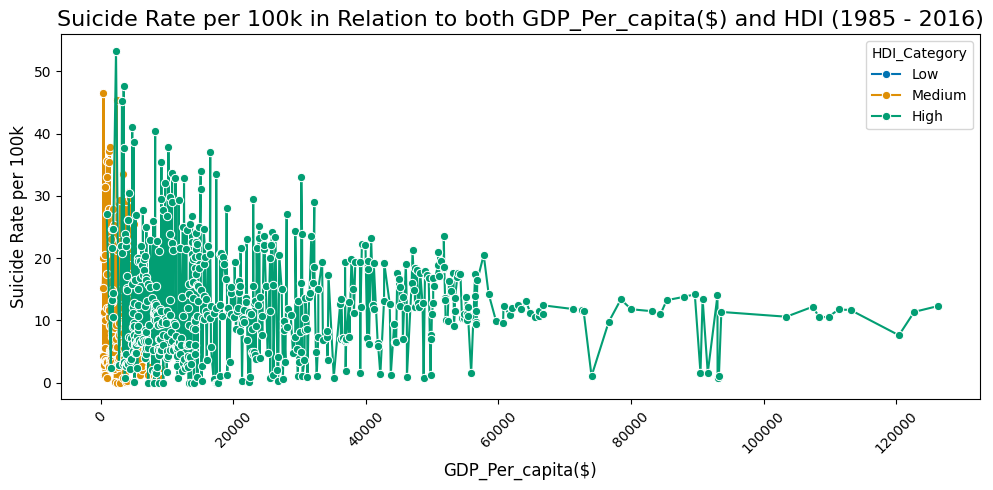


     gdp_per_capita($)  HDI_Per_Year  suicides/100k HDI_Category
0                  313         0.593      15.219167       Medium
1                  425         0.562      19.980833       Medium
2                  426         0.605       4.315833       Medium
3                  431         0.597          46.56       Medium
4                  462         0.609           1.19       Medium
..                 ...           ...            ...          ...
692             111328         0.886      11.763333         High
693             113120         0.888      11.681667         High
694             120423          0.89       7.623333         High
695             122729         0.888        11.3775         High
696             126352         0.892      12.323333         High

[697 rows x 4 columns]
Note: For countries with higher GDP and HDI, suicide rates tend to cluster between 7 and 12 per 100k.
This suggests a possible plateau, where increasing wealth or development no longer significan

In [30]:
#Task 2 continued, trends over time, continued descriptive statistics

#A couple things to maybe look at in this section of the project

#1.) Relationship between HDI and suicide/100k (total and past 10 years)
#2.) Relationship between GPD Per Capita, HDI, and suicide/100k

# Filter the data for the specified years
filtered_data = suicide_data_selected[(suicide_data_selected['year'] >= 1985) & (suicide_data_selected['year'] <= 2016)]

# Group the data by 'HDI_Per_Year', summing the suicide rates
suicides_by_hdi_year = filtered_data.groupby(['HDI_Per_Year'])['suicides/100k'].mean().reset_index()

# Sort by HDI_Per_Year
suicides_by_hdi_year = suicides_by_hdi_year.sort_values(by='HDI_Per_Year')

# Visualize the number of suicides over the HDI years
plt.figure(figsize=(10, 5))
sns.lineplot(x='HDI_Per_Year', y='suicides/100k', data=suicides_by_hdi_year, palette='colorblind', marker='o')

# Adding title and labels
plt.title('Suicide Rate per 100k in Relation to HDI (1985 - 2016)', fontsize=16)
plt.xlabel('HDI Per Year', fontsize=12)
plt.ylabel('Suicide Rate per 100k', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

correlation = suicides_by_hdi_year['HDI_Per_Year'].corr(suicides_by_hdi_year['suicides/100k'])
print(f'Correlation between HDI and Average Suicide Rate: {correlation:.2f}')
print('A correlation coefficient of 0.19 indicates a weak positive relationship between the Human Development Index (HDI) and the average suicide rate per 100k people in my dataset.\nThus as HDI improves, suicide rates seem to decrease')
print()
print('Note: the highest rates seem to be around 0.6 to 0.7 HDI, which suggests highest sucidies occur at the transition point between low development and high development country')
print('Some possible explanations could include things such as economic stress, social isolation, lack of mental health resources, cultural factors and historical contexts')
print('Additionally, the dataset I''m working with has many missing enteries for HDI, so that should be take into consideration')


#----------------------------------------------------------------------------------------------

#Now lets take a look at the relationship between GPD Per Capita, HDI, and suicide/100k

# Filter the data for the specified years
filtered_data = suicide_data_selected[(suicide_data_selected['year'] >= 1985) & (suicide_data_selected['year'] <= 2016)]

# Group the data by 'gdp_per_capita', use averages
suicides_by_gdp_hdi_year = filtered_data.groupby(['gdp_per_capita($)','HDI_Per_Year'])['suicides/100k'].mean().reset_index()

# Sort by gdp_per_capita
suicides_by_gdp_hdi_year = suicides_by_gdp_hdi_year.sort_values(by='gdp_per_capita($)')

#create categories for hue, to fit to graph, otherwise the hue is to large to fit on the graph
bins = [0, 0.55, 0.7, 1]
labels = ['Low', 'Medium', 'High']
suicides_by_gdp_hdi_year['HDI_Category'] = pd.cut(suicides_by_gdp_hdi_year['HDI_Per_Year'], bins=bins, labels=labels)


# Visualize the number of suicides over the gdp_per_capita($) and HDI
plt.figure(figsize=(10, 5))
sns.lineplot(x='gdp_per_capita($)', y='suicides/100k', hue='HDI_Category',data=suicides_by_gdp_hdi_year, palette='colorblind', marker='o')

# Adding title and labels
plt.title('Suicide Rate per 100k in Relation to both GDP_Per_capita($) and HDI (1985 - 2016)', fontsize=16)
plt.xlabel('GDP_Per_capita($)', fontsize=12)
plt.ylabel('Suicide Rate per 100k', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

print()
print(suicides_by_gdp_hdi_year)
print('Note: For countries with higher GDP and HDI, suicide rates tend to cluster between 7 and 12 per 100k.\nThis suggests a possible plateau, where increasing wealth or development no longer significantly lowers suicide rates.')
print('For countries with medium GDP and HDI There is a large range of suicide rates, from very low (1.19) to very high (46.56).\nThis variability suggests that economic hardship may correlate with higher suicide rates, but there are other protective factors in some regions that might keep the rates low.')

print()
print()
print('The above results suprised me as a researcher on the topic, I would have thought that there would be strong negative correlation between low GDP Per Capita, HDI, and sucide rate.')
print('I asked chatGPT the relationship without plugging in my data and got the following response, which backs my analysis')
print('From ChatGPT: The relationship between Gross Domestic Product (GDP), Human Development Index (HDI), and suicide rates can be complex and varies by country.\nWhile there can be a general trend where countries with lower GDP and HDI have higher suicide rates, it''s essential to consider other factors, including social support, cultural attitudes, and access to mental health care. ')

In [31]:
#Task 3, lets do some inferential statistics

#I now want to perform a regression analyis to see understand the impact of HDI and GDP more thoroughly. 
# This can help quantify how much variance in suicide rates can be explained by these factors:
import statsmodels.api as sm

suicides_by_gdp_hdi_year['gdp_per_capita($)'] = pd.to_numeric(suicides_by_gdp_hdi_year['gdp_per_capita($)'], errors='coerce')
suicides_by_gdp_hdi_year['suicides/100k'] = pd.to_numeric(suicides_by_gdp_hdi_year['suicides/100k'], errors='coerce')

# Convert to standard types
suicides_by_gdp_hdi_year['HDI_Per_Year'] = suicides_by_gdp_hdi_year['HDI_Per_Year'].astype(float)
suicides_by_gdp_hdi_year['gdp_per_capita($)'] = suicides_by_gdp_hdi_year['gdp_per_capita($)'].astype(float)

# Prepare the data for regression
X = suicides_by_gdp_hdi_year[['HDI_Per_Year', 'gdp_per_capita($)']]
y = suicides_by_gdp_hdi_year['suicides/100k']

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

print()
print('R-squared: 0.054 This means that approximately 5.4 percent of the variance in suicide rates can be explained by the model, which includes HDI_Per_Year and gdp_per_capita($).\nThis is relatively low, indicating that there are likely other factors influencing suicide rates that are not included in this model.')
print()
print('Constant: -12.7386 This is the intercept of the regression line, suggesting that if both predictors are zero, the predicted suicide rate would be negative, which is not interpretable in a real-world context.')
print()
print('HDI_Per_Year: 34.9150 For each unit increase in HDI_Per_Year, the suicide rate increases by approximately 34.92 suicides per 100k people, holding all else constant.')
print('The p-values for both HDI_Per_Year and gdp_per_capita($) are both less than 0.001, indicating that these predictors are statistically significant in explaining variations in suicide rates.')

                            OLS Regression Results                            
Dep. Variable:          suicides/100k   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     19.97
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           3.71e-09
Time:                        10:28:59   Log-Likelihood:                -2493.0
No. Observations:                 697   AIC:                             4992.
Df Residuals:                     694   BIC:                             5006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.7386      3.94